In [2]:
import os
import pandas as pd
import numpy as np

# Статистика

## Базовые понятия статистики

### Задание 1

Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

### Решение

In [3]:
list_columns = ['surgery?', 'Age', 'rectal_temperature', 'pulse', 'respiratory_rate', 
                'temperature_of_extremities', 'pain', 'outcome']

data_horses = pd.read_csv(os.path.join('C:', os.sep, 'Netology', 'practice_and_dz_stat', 'horse_data.csv'), header=None, 
                          na_values='?', usecols = [0, 1, 3, 4, 5, 6, 10, 22], names = list_columns)

data_horses.head()

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


Столбец Age является вторым в описании и имеет значения 1 = Adult horse и 2 = Young (< 6 months). В Python, нумерация начинается с 0, то есть столбец Age имеет порядковый номер 1, при изучении содержимого столбца установлено, что в столбце содержатся значения 1 и 9, что не соответсвует значениям в описании ввиду чего, делаем вывод, что наличие значения 9 является ошибкой и соответсвует значению 2, ввиду чего производим замену 9 на 2.

In [4]:
data_horses['Age'] = data_horses['Age'].replace(9, 2)
data_horses.head()

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

### Задание 2. Первичное изучение данных

In [5]:
data_horses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal_temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory_rate            242 non-null    float64
 5   temperature_of_extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [6]:
print('===========================================================')
print('Основные статистики:')
data_horses.describe()

Основные статистики:


,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.080000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,0.271746,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [7]:
print('===========================================================')
print('Значение моды и медианны по столбцу: ' + 'rectal temperature')
print('Моды', data_horses.rectal_temperature.round().mode()[0])
print('Медианны', data_horses.rectal_temperature.median())
print('\n')
print('===========================================================')
print('Значение моды и медианны по столбцу: ' + 'pulse')
print('Моды', data_horses.pulse.round().mode()[0])
print('Медианны', data_horses.pulse.median())
print('\n')
print('===========================================================')
print('Значение моды и медианны по столбцу: ' + 'respiratory rate')
print('Моды', data_horses.respiratory_rate.round().mode()[0])
print('Медианны', data_horses.respiratory_rate.median())
print('\n')
print('===========================================================')

Значение моды и медианны по столбцу: rectal temperature
Моды 38.0
Медианны 38.2


Значение моды и медианны по столбцу: pulse
Моды 48.0
Медианны 64.0


Значение моды и медианны по столбцу: respiratory rate
Моды 20.0
Медианны 24.5




In [8]:
# оценим распределние животных по лечению с хирургической опирацией и без нее

data_horses['surgery?'].value_counts().head()

1.0    180
2.0    119
Name: surgery?, dtype: int64

In [9]:
# оценим распределние животных по возрасту

data_horses['Age'].value_counts().head()

1    276
2     24
Name: Age, dtype: int64

In [10]:
# оценим распределние животных по температуре конечностей (крови)

data_horses['temperature_of_extremities'].value_counts().head()

3.0    109
1.0     78
2.0     30
4.0     27
Name: temperature_of_extremities, dtype: int64

In [11]:
# оценим распределние животных по уровню предполагаемого болевого синдрома животного

data_horses['pain'].value_counts().head()

3.0    67
2.0    59
5.0    42
4.0    39
1.0    38
Name: pain, dtype: int64

In [12]:
# оценим распределние животных по выживаемости

data_horses['outcome'].value_counts().head()

1.0    178
2.0     77
3.0     44
Name: outcome, dtype: int64

Общие вывод:

* Большенство ислледуемых животных являются взрослые особи.
* Больше половины животных проходили лечение включающее хирургическое вмешательство, была операция.
* Показатели среднего значения и моды ректальной температуры незначительно отклонены от нормы 37.8, тем не менее являются в переделах допустимого.
* Показатель среднего значения пульса, значительно выше нормы, показатель моды также превышает значение нормы 30-40, по показателю моды можем предположить, что на момент проведения исследования животные испытывали стресс и находились незначительном шоковом состоянии, тем не менее значительное отклонение среднего начения пульса от нормы говорит о наличии выброса в данных, либо присутвия в выборке больных животных испытывающих сильный болевой синдром, данные параметр требует дополнительного исследования.
* Менее у трети животных показатели температуры конечностей относятся к нормельным, также у трети животных имеелась повышенная температура конечностей, что коррелирует с ректальной температурой, у небольшого числа животных была пониженная температура конечностей, повышенний и пониженный показатель объясняются шоком и возможным болевым синдромом у животных.
* Лижь у не значительной части выборки ивотных отсутвовала тревога и боль на момент исследования, большая часть животных имела болевой синдром разной степени проявления.
* Более половины животных в выборе выжили после проведенного исследования, менее 1\6 части выборки были усыплены, менее трети от выборки животных скончалось.

In [13]:
# Выбросы

print('===========================================================')
print('Данные по столбцу: ' + 'rectal_temperature')
q1 = data_horses['rectal_temperature'].quantile(0.25)
q3 = data_horses['rectal_temperature'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print('Первый квантиль (25-й процентиль)', q1)
print('Третий квантиль (75-й процентиль)', q3)
print('Межквартильный размах', iqr)
print('===========================================================')
remove_outliers = data_horses[data_horses['rectal_temperature'].between(lower_bound, upper_bound, inclusive=True)].sort_values('rectal_temperature')
print('\nВыборосы в данных:')
result_outliers = pd.concat([data_horses, remove_outliers]).drop_duplicates(keep=False)
result_outliers['rectal_temperature'].loc[result_outliers['rectal_temperature'] > 0]

Данные по столбцу: rectal_temperature
Первый квантиль (25-й процентиль) 37.8
Третий квантиль (75-й процентиль) 38.5
Межквартильный размах 0.7000000000000028

Выборосы в данных:


20     39.9
44     35.4
54     40.3
75     39.7
80     36.4
91     40.3
99     39.6
118    36.5
141    36.0
238    36.1
251    36.6
259    40.8
281    40.0
298    36.5
Name: rectal_temperature, dtype: float64

In [14]:
print('===========================================================')
print('Данные по столбцу: ' + 'pulse')
q1 = data_horses['pulse'].quantile(0.25)
q3 = data_horses['pulse'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print('Первый квантиль (25-й процентиль)', q1)
print('Третий квантиль (75-й процентиль)', q3)
print('Межквартильный размах', iqr)
print('===========================================================')
remove_outliers = data_horses[data_horses['pulse'].between(lower_bound, upper_bound, inclusive=True)].sort_values('pulse')
print('\nВыборосы в данных:')
result_outliers = pd.concat([data_horses, remove_outliers]).drop_duplicates(keep=False)
result_outliers['pulse'].loc[result_outliers['pulse'] > 0]

Данные по столбцу: pulse
Первый квантиль (25-й процентиль) 48.0
Третий квантиль (75-й процентиль) 88.0
Межквартильный размах 40.0

Выборосы в данных:


3      164.0
41     150.0
55     160.0
255    184.0
275    150.0
Name: pulse, dtype: float64

In [15]:
print('===========================================================')
print('Данные по столбцу: ' + 'respiratory_rate')
q1 = data_horses['respiratory_rate'].quantile(0.25)
q3 = data_horses['respiratory_rate'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print('Первый квантиль (25-й процентиль)', q1)
print('Третий квантиль (75-й процентиль)', q3)
print('Межквартильный размах', iqr)
print('===========================================================')
remove_outliers = data_horses[data_horses['respiratory_rate'].between(lower_bound, upper_bound, inclusive=True)].sort_values('respiratory_rate')
print('\nВыборосы в данных:')
result_outliers = pd.concat([data_horses, remove_outliers]).drop_duplicates(keep=False)
result_outliers['respiratory_rate'].loc[result_outliers['respiratory_rate'] > 0]

Данные по столбцу: respiratory_rate
Первый квантиль (25-й процентиль) 18.5
Третий квантиль (75-й процентиль) 36.0
Межквартильный размах 17.5

Выборосы в данных:


3      84.0
39     96.0
41     72.0
82     80.0
84     80.0
103    68.0
106    96.0
120    66.0
125    68.0
208    80.0
229    70.0
244    88.0
255    84.0
265    68.0
295    70.0
Name: respiratory_rate, dtype: float64

Выводы о выбросах:

Как видно, количество экстремальных значений незначительно от общего числа выобрки, учитывая показатели здоровья описанные в предыдущих выводах и то, что на момент исследования животные могли испытывать стресс и шок, а также иметь болевой синдром и ухудшевшееся состояния здоровья по причине болезни, делаем вывод о том, что сильно отклоняющиеся значения пульса, дыхания и ректальной температуры носят естественный характер.

### Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [16]:
data_horses.head()

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


In [17]:
data_horses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal_temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory_rate            242 non-null    float64
 5   temperature_of_extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [18]:
print('===========================================================')
print('Пропуски в данных:')
for column, item in zip(list_columns, (data_horses.isna().mean() * 100).round(2)):
    print(f'Название столбца: {column}, наличие пропусков {item} %')
print('===========================================================')

Пропуски в данных:
Название столбца: surgery?, наличие пропусков 0.33 %
Название столбца: Age, наличие пропусков 0.0 %
Название столбца: rectal_temperature, наличие пропусков 20.0 %
Название столбца: pulse, наличие пропусков 8.0 %
Название столбца: respiratory_rate, наличие пропусков 19.33 %
Название столбца: temperature_of_extremities, наличие пропусков 18.67 %
Название столбца: pain, наличие пропусков 18.33 %
Название столбца: outcome, наличие пропусков 0.33 %


In [19]:
# предположим, мы хотим удалить только те строки, в которых как минимум 7/8 значений заполнено
update_data = data_horses.dropna(thresh=7)

In [20]:
print('===========================================================')
print('Пропуски в данных:')
for column, item in zip(list_columns, (update_data.isna().mean() * 100).round(2)):
    print(f'Название столбца: {column}, наличие пропусков {item} %')
print('===========================================================')

Пропуски в данных:
Название столбца: surgery?, наличие пропусков 0.0 %
Название столбца: Age, наличие пропусков 0.0 %
Название столбца: rectal_temperature, наличие пропусков 9.96 %
Название столбца: pulse, наличие пропусков 1.3 %
Название столбца: respiratory_rate, наличие пропусков 9.09 %
Название столбца: temperature_of_extremities, наличие пропусков 6.49 %
Название столбца: pain, наличие пропусков 6.49 %
Название столбца: outcome, наличие пропусков 0.0 %


Вывод о наличии пропусков:
<a id='subtask6'></a>
Как видим, количество пропусков сократилось, ввиду наличия пустных строк, предположим, что наличие пропусков объясняется невозможностью обследовать животное.

In [21]:
print(f'Количество теряемых данных при исключении строк, в которых как минимум 7/8 значений заполнено: {100 - len(update_data)/len(data_horses) * 100} %')

Количество теряемых данных при исключении строк, в которых как минимум 7/8 значений заполнено: 23.0 %


Мы сохраняем 77 % данных, принимая решение о том, что это большая потеря для нашего исследования.

In [22]:
# изучим корреляцию данных

update_data.corr()

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
surgery?,1.000000,-0.136751,0.046091,-0.244711,-0.222719,-0.096500,-0.335052,-0.117550
Age,-0.136751,1.000000,0.144884,0.551941,0.376876,-0.044850,0.066234,0.048753
rectal_temperature,0.046091,0.144884,1.000000,0.168683,0.260113,0.080454,-0.106532,-0.055739
pulse,-0.244711,0.551941,0.168683,1.000000,0.447817,0.304836,0.286517,0.357030
respiratory_rate,-0.222719,0.376876,0.260113,0.447817,1.000000,0.102315,0.143980,0.103425
temperature_of_extremities,-0.096500,-0.044850,0.080454,0.304836,0.102315,1.000000,0.201947,0.326925
pain,-0.335052,0.066234,-0.106532,0.286517,0.143980,0.201947,1.000000,0.280683
outcome,-0.117550,0.048753,-0.055739,0.357030,0.103425,0.326925,0.280683,1.000000


Гипотезы:  

* Делаем предположение, что показатели пусльса и частоты дыхания зависят от возрастной группы животного
* Делаем предположение, что болевой синдром зависит от была ли проведена операция животному во время лечепния
* Делаем предположение, что показатель ректальной температуры у животных носят естественный характер на момент исследования
* Делаем предположение, что показатель температуры конечностей(крови) носит естественный характер и объясняется стрессом и шоком, которые животное могло испытывать на момент исследования или как реакция на болевой синдром от течения болезни

In [23]:
fill_data_horses = data_horses

In [24]:
fill_data_horses.head()

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


In [25]:
# заполняем столбец пульса и частоты дыхания согласно нашей гипотезе, с учетом возрастной группы животного

fill_data_horses['pulse'].fillna(data_horses.groupby('Age')['pulse'].transform('median'), inplace=True)
fill_data_horses['respiratory_rate'].fillna(data_horses.groupby('Age')['respiratory_rate'].transform('median'), inplace=True)

In [26]:
# заполняем столбец ректальной температуры и температуры конечностей согласно нашей гипотезе

fill_data_horses['temperature_of_extremities'].fillna(fill_data_horses.temperature_of_extremities.median(), inplace=True)
fill_data_horses['rectal_temperature'].fillna(fill_data_horses.temperature_of_extremities.median(), inplace=True)

In [27]:
# в столбце о уровне боли, производим замену значения NaN на 0, для удобства дальнейше работы

fill_data_horses.pain.fillna(0, inplace=True)

In [28]:
# заполняем столбец уровня боли согласно нашей гипотезе, с учетом наличия операции в лечении животного


fill_data_horses['pain'].loc[fill_data_horses['surgery?'] == 1.].fillna(data_horses['pain'].loc[data_horses['surgery?'] == 1.].mode()[0], inplace=True)
fill_data_horses['pain'].loc[fill_data_horses['surgery?'] != 1.].fillna(data_horses['pain'].loc[data_horses['surgery?'] != 1.].mode()[0], inplace=True)

In [29]:
# оставшееся количество пустых строк не значительно, они не повлияют на наше исследования, принимаем решение об удалении 1 строки

fill_data_horses.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         299 non-null    int64  
 2   rectal_temperature          299 non-null    float64
 3   pulse                       299 non-null    float64
 4   respiratory_rate            299 non-null    float64
 5   temperature_of_extremities  299 non-null    float64
 6   pain                        299 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 21.0 KB


In [30]:
### Итоговый датафрей

fill_data_horses.head(15)

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,3.0,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,3.0,0.0,2.0
5,2.0,1,3.0,60.0,24.0,2.0,2.0,1.0
6,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
7,1.0,1,3.0,60.0,24.0,3.0,0.0,2.0
8,2.0,1,3.0,80.0,36.0,3.0,4.0,3.0
9,2.0,2,38.3,90.0,49.0,1.0,5.0,1.0


### Задание 4
Смоделировать игру против лотерейного автомата типа “777”. Игрок платит 1 руб., после чего выпадает случайное целое число, равномерно распределенное от 0 до 999. При некоторых значениях числа игрок получает выигрыш (см. справа).  

Выгодна ли игра игроку?  

Сколько в среднем приобретает  
или теряет игрок за одну игру?  

777: 200 руб.  
999: 100 руб.  
555: 50 руб.  
333: 15 руб.  
111: 10 руб.  
*77: 5 руб.  
**7: 3 руб.  
*00: 2 руб.  
**0: 1 руб.  

* – любая цифра  
Дополнительное задание повышенной сложности. Теоретически рассчитать средний выигрыш (проигрыш) и сравнить с результатами моделирования  

### Решение

In [31]:
import numpy as np

In [32]:
money_total = 1000000   # Количество попыток, оно же сумма ставок 
win = 0    # Количество успехов
loss = 0   # Количество проигрышей

#money_total = int(input('Введите сумму оплаты лотереи'))

winning_amount = 0

for i in range(money_total):
    random_score = np.random.randint(0, 1000)    # Случайное количество очков от 1 до 999
    if random_score == 777:   # 1 число
        win += 1
        winning_amount += 200
    elif random_score == 999: # 1 число
        win += 1
        winning_amount += 100
    elif random_score == 555: # 1 число 
        win += 1
        winning_amount += 50
    elif random_score == 333: # 1 число
        win += 1
        winning_amount += 15
    elif random_score == 111: # 1 число
        win += 1
        winning_amount += 10
    elif random_score%100 == 77 and random_score != 777: # 9 чисел
        win += 1
        winning_amount += 5
    elif random_score%10 == 7: # 90 чисел
        win += 1
        winning_amount += 3
    elif random_score%100 == 0: # 10 чисел
        win += 1
        winning_amount += 2
    elif random_score%10 == 0: # 90 чисел
        win += 1
        winning_amount += 1
    else:
        loss += 1

if winning_amount > 0:
    print('Ваш выигрыш составил:', winning_amount, 'руб.')
else:
    print('Вы проиграли:(')

p = 204 / 1000                                  # Теоретическая вероятность
p_monte_carlo = win / money_total             # Вероятность из моделирования
winning_model = winning_amount / money_total  # средний выигрыш за одну игру


print(f'Количество побед: {win}. Проигрыш: {loss} руб.. Ставка: {money_total} руб.')
print(f'Теоретическая вероятность: {p}. Вероятность из моделирования: {p_monte_carlo}. Средний выигрыш за одну игру: {round(100*winning_model)} копеек.') 
print(f'Средняя потеря за одну игру: {round(100*(1-winning_model))} копеек')

Ваш выигрыш составил: 796858 руб.
Количество побед: 204372. Проигрыш: 795628 руб.. Ставка: 1000000 руб.
Теоретическая вероятность: 0.204. Вероятность из моделирования: 0.204372. Средний выигрыш за одну игру: 80 копеек.
Средняя потеря за одну игру: 20 копеек


In [33]:
def shoot():
    return np.random.randint(0, 1000)

(array([105., 102.,  95.,  99., 103., 101.,  91.,  95., 111.,  98.]),
 array([  1. , 100.7, 200.4, 300.1, 399.8, 499.5, 599.2, 698.9, 798.6,
        898.3, 998. ]),
 <BarContainer object of 10 artists>)

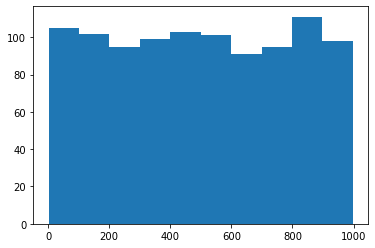

In [34]:
# Построим  график выпадения чисел от 0 до 999:

from matplotlib import pyplot as plt
%matplotlib inline
y = [ shoot() for v in range(1000) ]
plt.hist(y)

Выводы:

Вопрос 1: Выгодна ли игроку игра?
Ответ: Игра игроку не выгодна.

Вопрос 2: Сколько в среднем приобретает или теряет игрок за одну игру?
Ответ: Игрок за одну игру теряет сумму платы за игру, то есть 1 рубль потери за каждую проигрышную игру. Игрок ничего не приобретает за одну игру так как для одной игры вероятность выигрыша сильно мала.

Теоретически рассчитать средний
выигрыш (проигрыш) и сравнить с результатами
моделирования

In [ ]:
# среднее значение выигрыша

winning_sum = [200, 100, 50, 15, 10, 5, 3, 2, 1]
winning=0

for i in winning_sum:
    x = p * i + (1-p)*0
    winning += x
print(winning)

In [ ]:
# среднее значение проигрыша
winning_sum = [200, 100, 50, 15, 10, 5, 3, 2, 1]
lossing=0
p_2 = 1-p

for i in winning_sum:
    x = p_2 * 0 + (1-p) * i
    lossing += x
print(lossing)

In [36]:
# среднее значение выигрыша при моделировании 
winning_model = winning_amount / money_total
print(f'Средний выигрыш за одну игру: {round(100*winning_model)} копеек.')

Средний выигрыш за одну игру: 80 копеек.


In [37]:
# среднее значение проигрыша при моделировании 
print(f'Средняя потеря за одну игру: {round(100*(1-winning_model))} копеек')

Средняя потеря за одну игру: 20 копеек


In [38]:
#определим вероятность каждого выигрышного исхода и воспользуемся формулой P1*X1 + P2*X2 + ... + Pn*Xn  :

victory = 0.001*(200 + 100 + 50 + 15 + 10) + (9/1000)*5 + (10/1000)*2 + ((99-9)/1000)*3 + ((100-10)/1000)*1
victory

0.7999999999999999

## Корреляция и корреляционный анализ

### Задание 5
Необходимо ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

### Решение

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data_water = pd.read_csv(os.path.join('C:', os.sep, 'Netology', 'water.csv'))
data_water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


### Корреляция

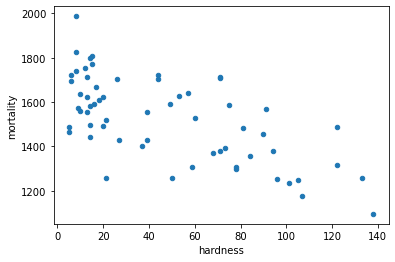

In [42]:
# точечный график

data_water.plot(kind='scatter', x='hardness', y='mortality');

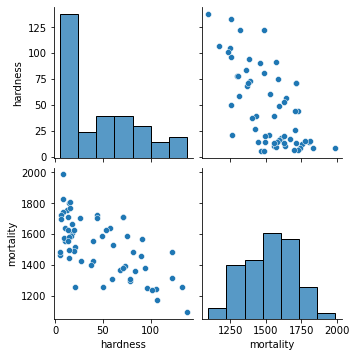

In [43]:
sns.pairplot(data_water[['hardness','mortality']]);

In [44]:
# коэффициент корреляции Пирсона

data_water[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [45]:
# коэффициент корреляции Спирмена

data_water[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [46]:
# коэффициент корреляции Кенделла

data_water[['hardness','mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


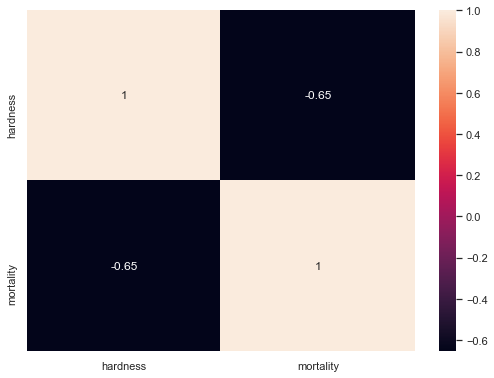

In [47]:
sns.set(rc={'figure.figsize':(8.7, 6.27)})
sns.heatmap(data_water[['hardness','mortality']].corr(), annot=True);

Выводы:
1. Между жесткостью воды и смертностью, обратная взаимосвязь, коэффициент корреляции отрицательный.
2. Линейная связь между жесткостью воды и смертностью выражена умеренно сильная по методу Спирмена.
3. Гипотеза: чем выше сметрность, тем ниже жесткость воды, и наоборот.

### Регрессия

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [49]:
X = data_water[['hardness']]
y = data_water['mortality']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [51]:
X_train.shape

(42, 1)

In [52]:
X_test.shape

(19, 1)

In [53]:
y_train.shape

(42,)

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [55]:
# коэффициент линейной регрессии

model.coef_

array([-3.13167087])

In [56]:
model.intercept_

1668.9722977277095

In [57]:
# прогноз

y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [58]:
# значение коэффициента детерминации

model.score(X_test, y_test) 

0.5046490611017092

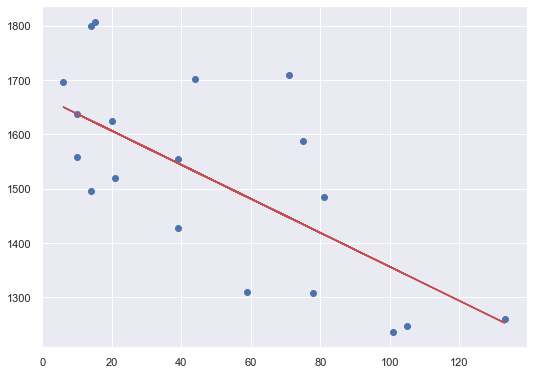

In [59]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [60]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [62]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [63]:
X_const.shape

(42, 2)

In [64]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [65]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           7.83e-06
Time:                        14:40:36   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [66]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.396789010091228


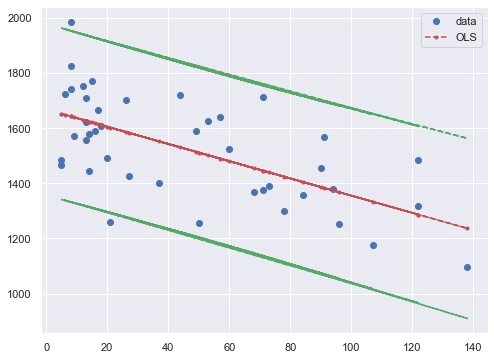

In [67]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

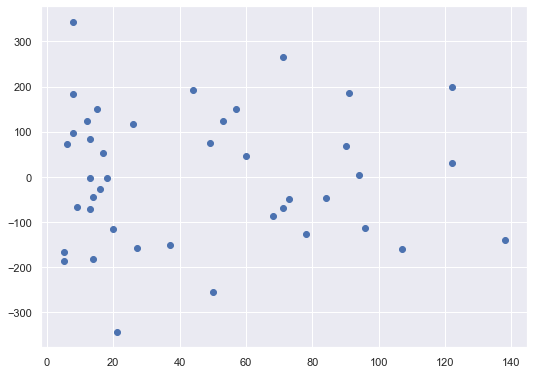

In [68]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid);

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <BarContainer object of 10 artists>)

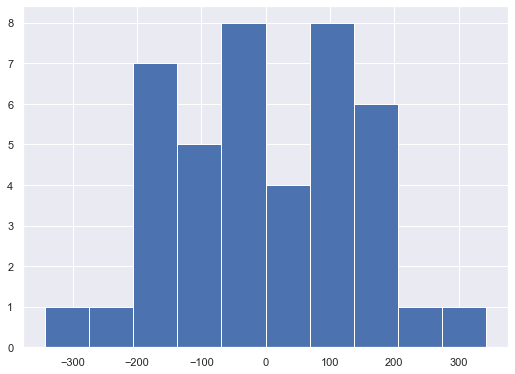

In [69]:
plt.hist(results.resid)

Выводы:
1. Коэффициент регрессии говорит, что чем больше жесткость воды тем меньше смертность (отрицательный коэффициент)
2. Сильный разброс фактических данных вокруг модели, для небольшого количества данных прогноз работает.
3. Коэффициент детерминации равен 0.50 то есть на 50% жесткость воды обусловлена показателями сметрности.
4. Остатки распределены случайны, взаимосвязь отсутствует, распределение остатков носит вид колокола, что говорит о нормальном распределении.

In [70]:
## Зависимость для северных и южных городов по отдельности

data_north = data_water.loc[data_water.location == 'North']
data_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


In [71]:
data_south = data_water.loc[data_water.location == 'South']
data_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


### Север

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


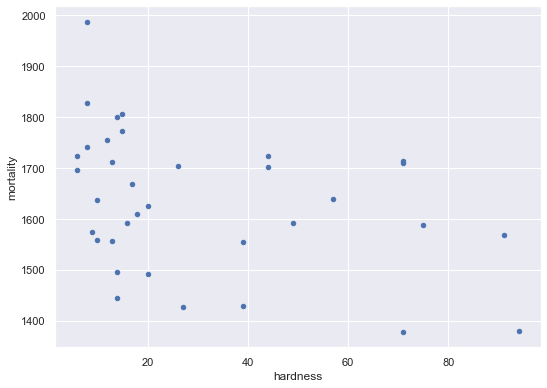

In [72]:


data_north.plot(kind='scatter', x='hardness', y='mortality');

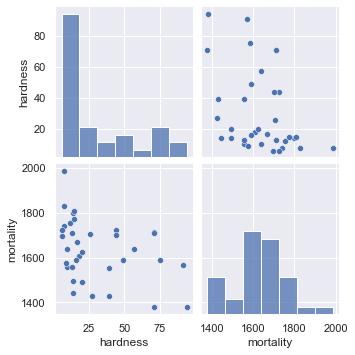

In [73]:
sns.pairplot(data_north[['hardness','mortality']]);

In [74]:
# коэффициент корреляции Пирсона

data_north[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [75]:
# коэффициент корреляции Спирмена

data_north[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [76]:
# коэффициент корреляции Кенделла

data_north[['hardness','mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


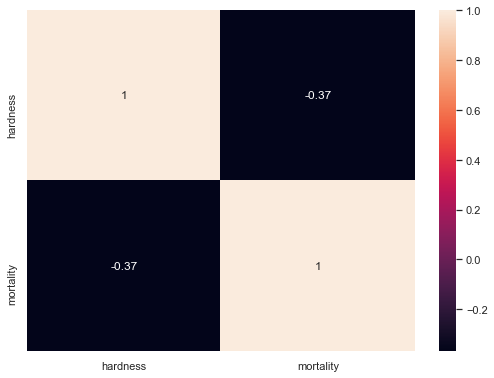

In [77]:
sns.set(rc={'figure.figsize':(8.7, 6.27)})
sns.heatmap(data_north[['hardness','mortality']].corr(), annot=True);

In [78]:
X_north = data_north[['hardness']]
y_north = data_north['mortality']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_north, y_north, test_size=0.30, random_state=42)

In [80]:
X_train.shape

(24, 1)

In [81]:
X_test.shape

(11, 1)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [83]:
# коэффициент линейной регрессии

model.coef_

array([-1.97686226])

In [84]:
model.intercept_

1688.150229031281

In [85]:
# прогноз

y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [86]:
# значение коэффициента детерминации

model.score(X_test, y_test) 

0.018885304285745863

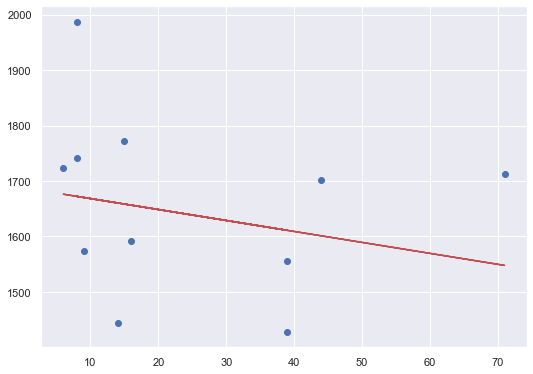

In [87]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r');

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_north, y_north, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу
X_const.shape

(24, 2)

In [89]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [90]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Mon, 28 Jun 2021   Prob (F-statistic):             0.0316
Time:                        14:44:05   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

In [ ]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

In [ ]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid);

In [ ]:
plt.hist(results.resid)

### Юг

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

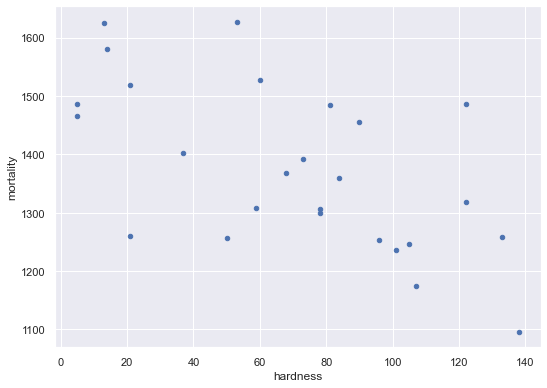

In [91]:
data_south.plot(kind='scatter', x='hardness', y='mortality')

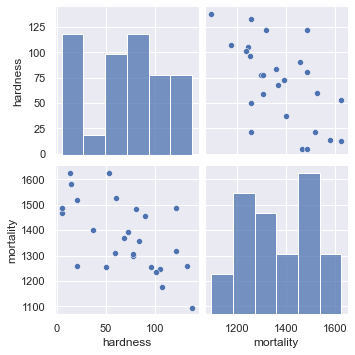

In [92]:
sns.pairplot(data_south[['hardness','mortality']]);

In [93]:
# коэффициент корреляции Пирсона

data_south[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [94]:
# коэффициент корреляции Спирмена

data_south[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [95]:
# коэффициент корреляции Кенделла

data_south[['hardness','mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


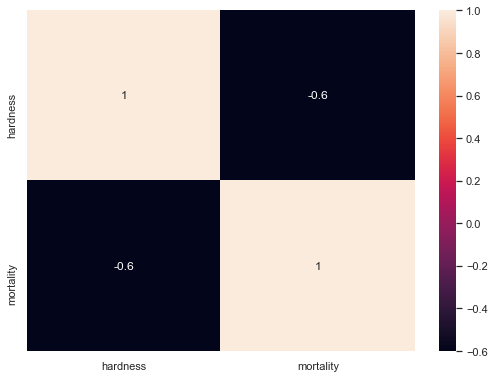

In [96]:
sns.set(rc={'figure.figsize':(8.7, 6.27)})
sns.heatmap(data_south[['hardness','mortality']].corr(), annot=True);

In [97]:
X_south = data_south[['hardness']]
y_south = data_south['mortality']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_south, y_south, test_size=0.30, random_state=42)

In [99]:
X_train.shape

(18, 1)

In [100]:
X_test.shape

(8, 1)

In [101]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [102]:
# коэффициент линейной регрессии

model.coef_

array([-3.51342921])

In [103]:
model.intercept_

1640.2204603423374

In [104]:
# прогноз

y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [105]:
# значение коэффициента детерминации

model.score(X_test, y_test)

-2.5519223012352077

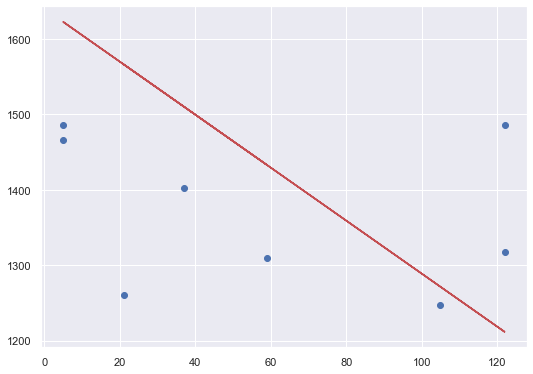

In [106]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r');

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_south, y_south, test_size=0.30, random_state=42)

In [108]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [109]:
X_const.shape

(18, 2)

In [110]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [111]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           7.30e-05
Time:                        14:48:49   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

C:\Users\ivana\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [112]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1640.220460
hardness      -3.513429
dtype: float64
R2:  0.6363808308877189


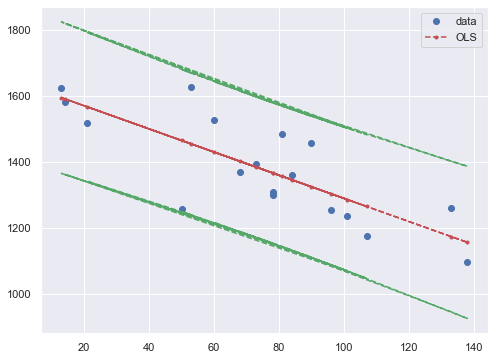

In [113]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

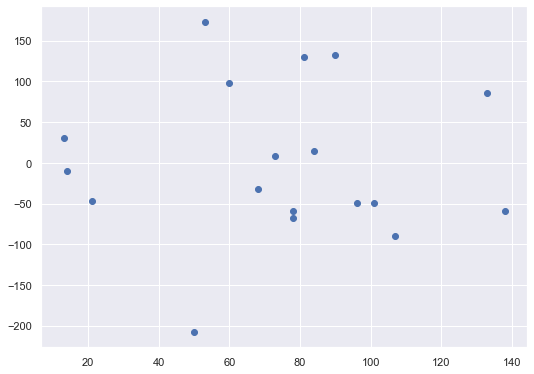

In [114]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid);

(array([1., 0., 0., 4., 4., 3., 1., 1., 3., 1.]),
 array([-207.54899972, -169.49497096, -131.4409422 ,  -93.38691343,
         -55.33288467,  -17.2788559 ,   20.77517286,   58.82920162,
          96.88323039,  134.93725915,  172.99128791]),
 <BarContainer object of 10 artists>)

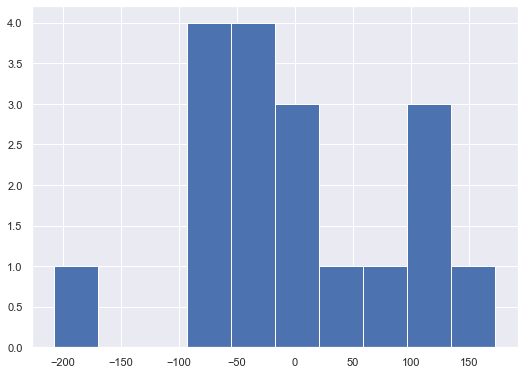

In [115]:
plt.hist(results.resid)

Выводы:
По Cеверу
1. Между жесткостью воды и смертностью, обратная взаимосвязь, коэффициент корреляции отрицательный.
2. Линейная связь между жесткостью воды и смертностью выражена слабо по методу Спирмена.
3. Коэффициент регрессии говорит, что чем больше жесткость воды тем меньше смертность (отрицательный коэффициент), регрессия слабая.
4. Сильный разброс фактических данных вокруг модели, для небольшого количества данных прогноз работает.
5. Коэффициент детерминации равен 0.18 то есть на 18% жесткость воды обусловлена показателями сметрности, коэффициент низкий, зависимость слабоя.
6. Остатки распределены случайны, распределение остатков носит вид половины колокола, что говорит о ненормальном распределении.

По Югу:
1. Между жесткостью воды и смертностью, обратная взаимосвязь, коэффициент корреляции отрицательный.
2. Линейная связь между жесткостью воды и смертностью выражена умеренно сильная по методу Спирмена.
3. Коэффициент регрессии говорит, что чем больше жесткость воды тем меньше смертность (отрицательный коэффициент), регрессия слабая.
4. Средний разброс фактических данных вокруг модели, для пловины количества данных прогноз работает.
5. Коэффициент детерминации равен 0.63 то есть на 63% жесткость воды обусловлена показателями сметрности, коэффициент средний, зависимость заметная.
5. Остатки распределены случайны, взаимосвязь отсутствует, распределение остатков носит вид колокола, что говорит о нормальном распределении.


Зависимость для городов по отдельности не сохраняется, зависимость городов Юга похожа на общую, зависимость городов Севера отличается от общей.

## Логистическая регрессия и дискриминационный анализ

### Задание 6

- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
- Разделите данные на выборку для обучения и тестирования
- Постройте модель LDA
- Визуализируйте предсказания для тестовой выборки и центры классов
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

### Решение

In [116]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [117]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

### Данные

In [118]:
iris = load_iris()

In [119]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [120]:
# загружаем данные в датафрейм

data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [121]:
# усовершенствуем названия столбцов для удобной работы с ними, заменим пробел на нижнее подчеркивание

for col in data.columns :
    if ' ' in col:
        data.rename({col:col.replace(' ', '_')}, inplace=True, axis=1)

In [122]:
data[['sepal_length_(cm)', 'sepal_width_(cm)']].head()

,sepal_length_(cm),sepal_width_(cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [123]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [124]:
# разделяем выборку на тренировочную и тестовую

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['sepal_length_(cm)', 'sepal_width_(cm)']], 
                                                    variety, test_size = 0.25)

### LDA-модель

In [125]:
# импортируем LDA-функционал

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [126]:
lda = LinearDiscriminantAnalysis()

In [127]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [128]:
# делаем прогноз на тестовой выборке

lda.predict(X_test)

array([2, 2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1])

In [129]:
# смотрим разницу факта и прогноза

result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [130]:
result

,0,1
0,1,2
1,2,2
2,2,1
3,0,0
4,2,2
5,0,0
6,0,1
7,0,0
8,1,2
9,2,1


In [131]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [132]:
accuracy_score(y_test, lda.predict(X_test))

0.6842105263157895

In [133]:
# коэффициенты дискриминатных линий

lda.coef_

array([[-5.50110275,  7.64727508],
       [ 1.36337592, -3.69352636],
       [ 4.28640528, -4.16043183]])

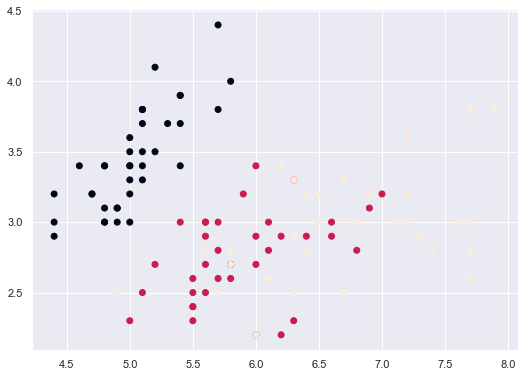

In [134]:
# визуализируем дискриминантную линию только по 2 признакам

plt.scatter(X_train['sepal_length_(cm)'], X_train['sepal_width_(cm)'], c=y_train)
plt.show()

In [135]:
lda.means_

array([[5.02894737, 3.45      ],
       [5.89459459, 2.75675676],
       [6.66756757, 2.97297297]])

<ipython-input-136-9d2c01d66edc>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',


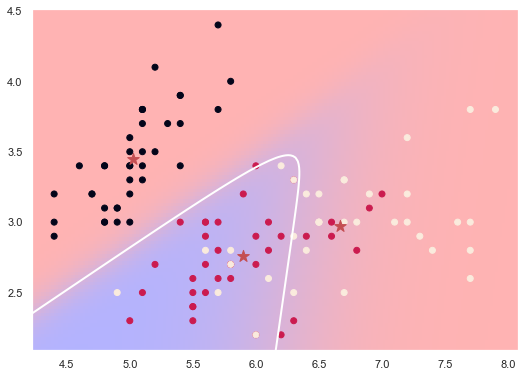

In [136]:
# сам scatter plot
plt.scatter(X_train['sepal_length_(cm)'], X_train['sepal_width_(cm)'], c = y_train)

# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c = 'r', s = 150, marker = '*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder = -1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths = 2., colors = 'white');

In [137]:
# какая будет точность?

accuracy_score(y_test, lda.predict(X_test))

0.6842105263157895

### Логистическая модель

In [138]:
# заменим модель на логистическую регресиию

from sklearn.linear_model import LogisticRegression

In [139]:
lr = LogisticRegression()

In [140]:
lr.fit(X_train, y_train)

LogisticRegression()

In [141]:
lr.predict(X_train)

array([1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1,
       1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2,
       1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2,
       2, 0, 2, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1,
       0, 0])

In [142]:
accuracy_score(y_test, lr.predict(X_test))

0.7105263157894737

In [143]:
lr.coef_

array([[-2.44598248,  2.20820675],
       [ 0.45598637, -1.48402744],
       [ 1.98999611, -0.72417931]])

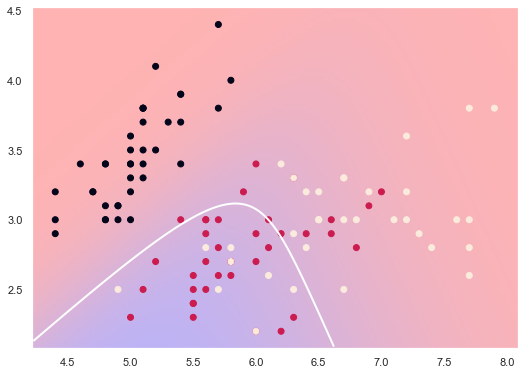

In [144]:
plt.scatter(X_train['sepal_length_(cm)'], X_train['sepal_width_(cm)'], c=y_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

### Кластеризация

In [145]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [146]:
scaler = StandardScaler()

In [149]:
# fit-transform сразу обучается и преобразует данные

X_scaled = scaler.fit_transform(data[['sepal_length_(cm)', 'sepal_width_(cm)']])

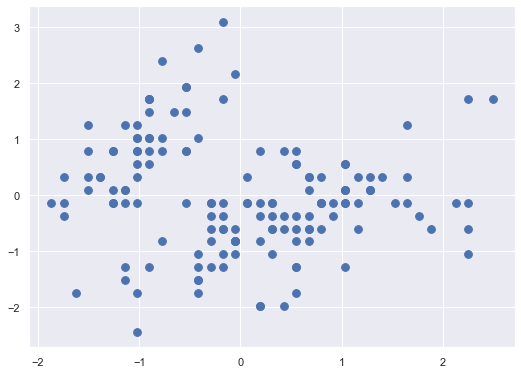

In [150]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60);

In [151]:
from sklearn.cluster import KMeans

In [152]:
# явно указываем количество кластеров 

kmeans = KMeans(n_clusters=2)

# fit_predict обучается на данных и каждому объекту присваивает кластер

clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

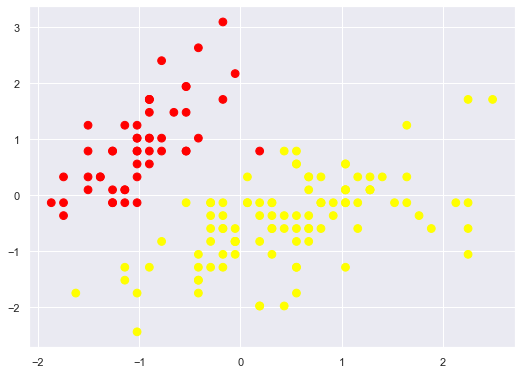

In [153]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60);

In [154]:
# строим график локтя

# создаем список для инерции

k_inertia = []

# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

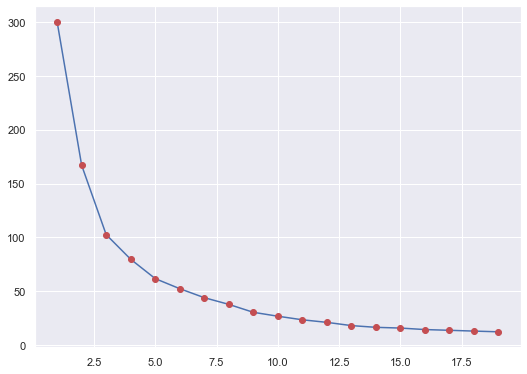

In [155]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [156]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

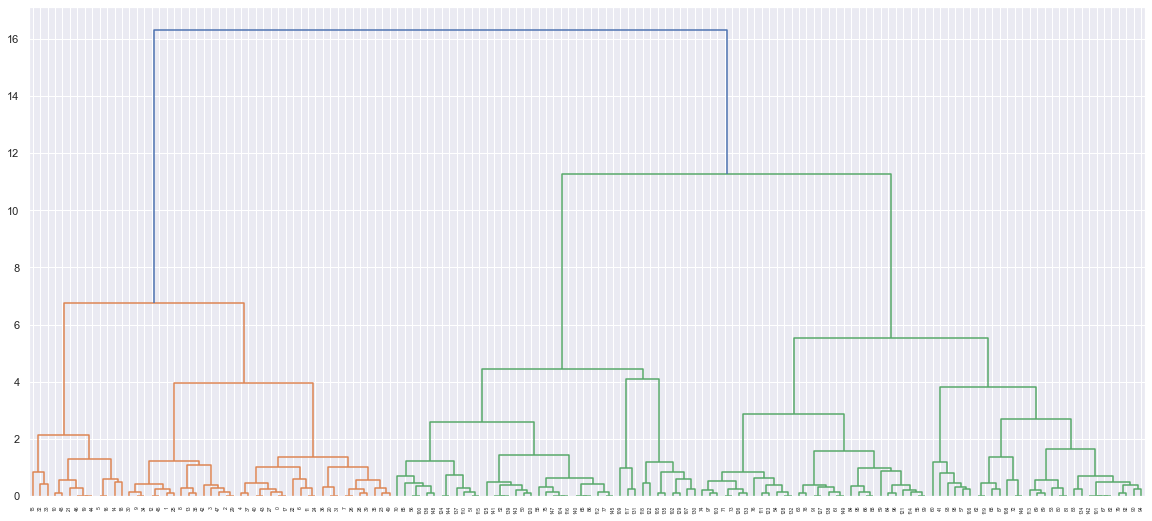

In [157]:
# строим дендрограмму

distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками

# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма

Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [158]:
# делаем уже кластеризацию по факту

from sklearn.cluster import AgglomerativeClustering

In [159]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

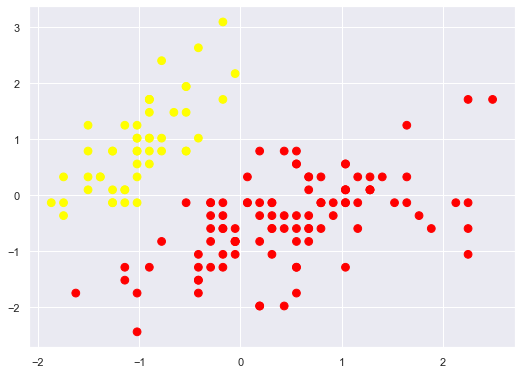

In [160]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60);

Вывод: 
Оптимальное число кластеров 2

### Решающие деревья

In [161]:
from matplotlib.colors import ListedColormap
from sklearn import metrics, tree 
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [162]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [163]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

In [164]:
iris = load_iris()

In [165]:
# загружаем данные в датафрейм

data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [166]:
# усовершенствуем названия столбцов для удобной работы с ними, заменим пробел на нижнее подчеркивание

for col in data.columns :
    if ' ' in col:
        data.rename({col:col.replace(' ', '_')}, inplace=True, axis=1)

In [167]:
data = data[['sepal_length_(cm)', 'sepal_width_(cm)']]

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    variety, test_size = 0.25)

In [169]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [170]:
predictions = clf.predict(X_test)
metrics.accuracy_score(y_test, predictions)

0.6842105263157895

Правильно оцениваем примено 52 % наших данных.

In [171]:
predictions

array([0, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0])

In [172]:
# Разделяющая поверхность

def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [173]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [174]:
X_train = X_train.values
X_test = X_test.values

<ipython-input-173-5f89f08bf2a5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-173-5f89f08bf2a5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


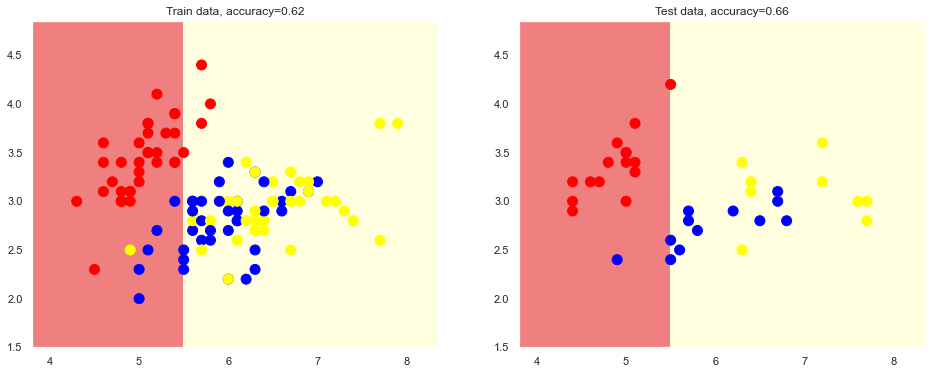

In [175]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

Два признака недостаточно для классификации.

<ipython-input-173-5f89f08bf2a5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-173-5f89f08bf2a5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


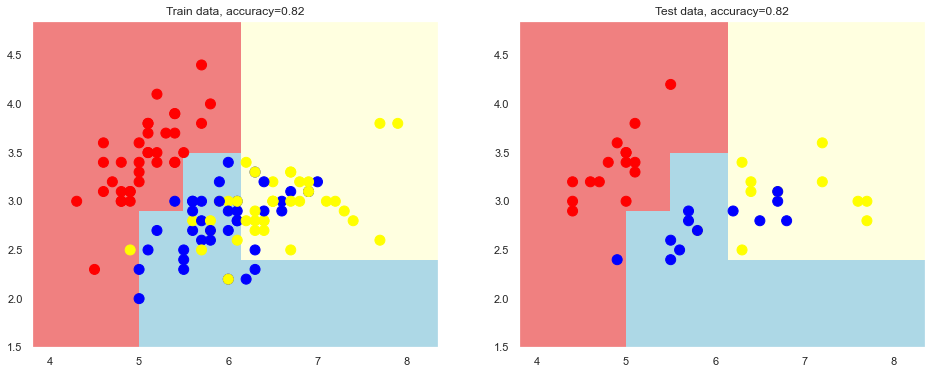

In [176]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 3)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

<ipython-input-173-5f89f08bf2a5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-173-5f89f08bf2a5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


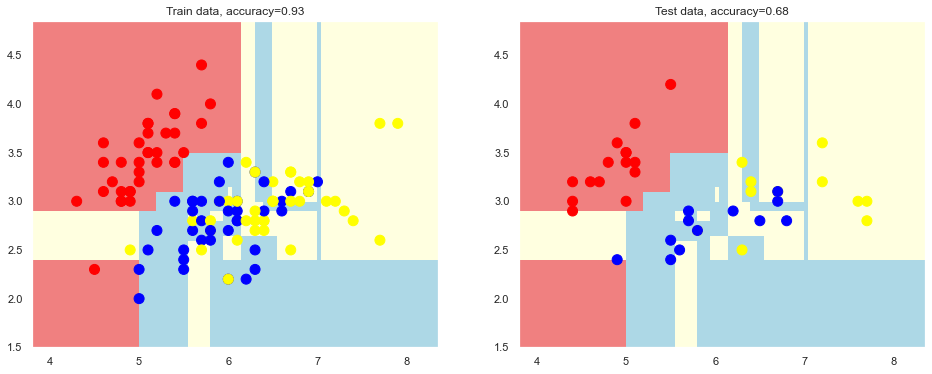

In [177]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 10)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

<ipython-input-173-5f89f08bf2a5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-173-5f89f08bf2a5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


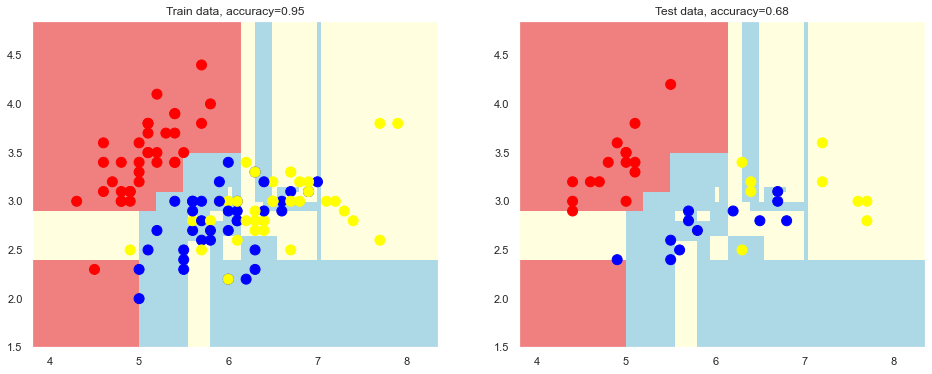

In [178]:
estimator = tree.DecisionTreeClassifier(random_state = 1)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

<ipython-input-173-5f89f08bf2a5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-173-5f89f08bf2a5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


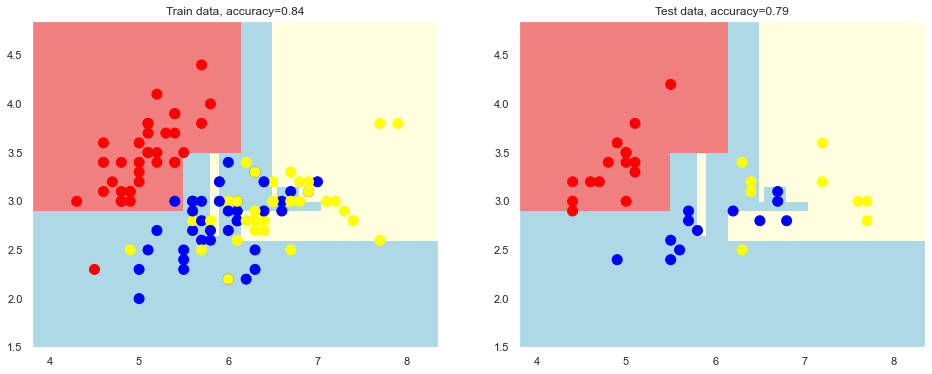

In [179]:
estimator = tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 3)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

<ipython-input-173-5f89f08bf2a5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-173-5f89f08bf2a5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


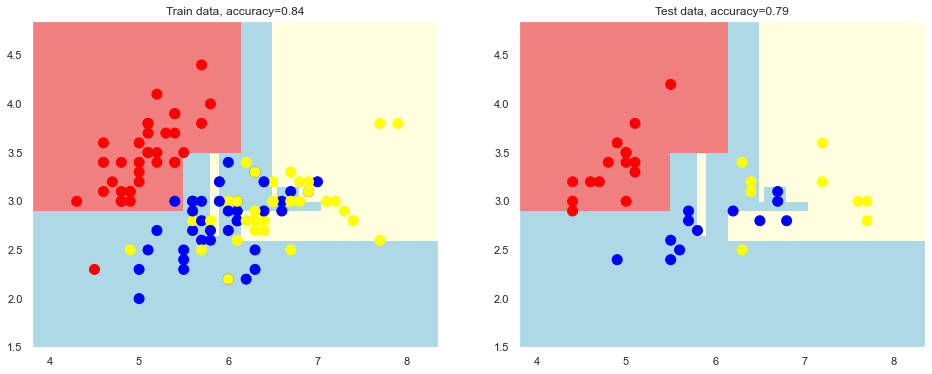

In [180]:
estimator = tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 3)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

Данная модель лучше покачеству на обучающей выборке, и хуже на тестовой, увеличение глубины дерева положительно сказывается на качестве модели, но мы сталкиваемся с переобучением, чтобы улучшить этот момент, ограничиваем ветвление, тем не менее нашей модели есть куда рости, так как мы получаем средний результат.

## Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок

### Задание 6
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

### Решение

In [181]:
sigma = 15  # Стандартное отклонение
Z = 1.96  #  %   # Квантиль нормального распределения. 
Delta = 5 #%         #Погрешность

In [182]:
import scipy.stats as st

from math import sqrt

betta = 0.95 # уровень доверия
D = 225 # дисперссия 
sigma = sqrt(D) # Стандартное отклонение
Delta = 3 #Погрешность
alpha = 1- betta  # уровень значимости
Z = st.norm.ppf(1 - ((1 - betta)/2))

N = int(((sigma*Z)/Delta)**2)
print('Минимально необходимый объем выборки:', N)

n = N  #Запишите в эту переменную ваш высчитанный ответ!


Минимально необходимый объем выборки: 96


### Задание 7
Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

### Решение

In [183]:
import scipy.stats as stats

population_men  = stats.norm.rvs(loc = 19, scale = 171, size = 11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc = 16, scale = 165, size = 12000)  # Выборка женщин со средним ростом 165

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

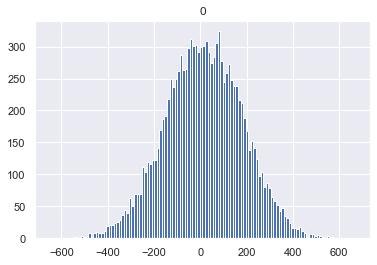

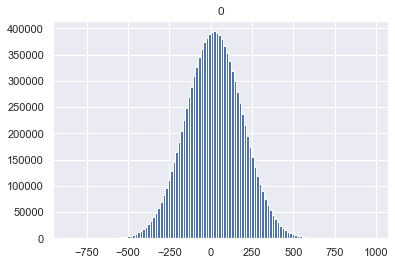

In [184]:
np.random.seed(12)
pd.DataFrame(population_women).hist(bins=120)

population_general=np.concatenate((population_men, population_women))
population_general.mean()
pd.DataFrame(population_general).hist(bins=120)

In [191]:
t , p  = stats.ttest_ind(population_men, population_women)
print("t = " + str(t))
print("p = " + str(p))

t = 3.392970141225722
p = 0.0006913941744049115


In [195]:
print('Значение 0.00069 говорит о том, что существует вероятность 0,06 % того, что выборочные данные для двух идентичных групп сильно различаются. Это меньше, чем уровень значимости 0,1%.')

Значение 0.00069 говорит о том, что существует вероятность 0,06 % того, что выборочные данные для двух идентичных групп сильно различаются. Это меньше, чем уровень значимости 0,1%.


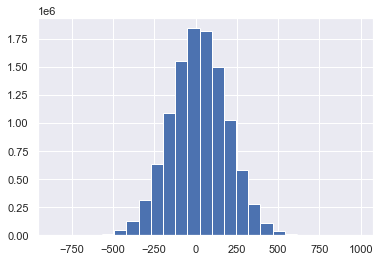

In [193]:
plt.hist(population_men, bins=25); #Выборка мужчин

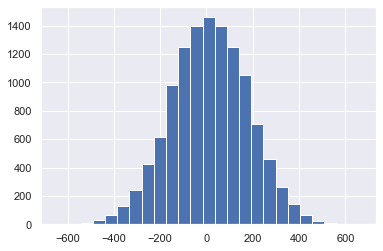

In [194]:
plt.hist(population_women, bins=25);  #Выборка женщин

### Задание 8
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.

### Решение

In [196]:
Z = 1.96 #95% # Квантиль нормального распределения
sigma = 150 # Стандартное отклонение
e = 50 #% #Погрешность

N = int(((sigma*Z)/e)**2)
print('Минимально необходимый объем выборки:', N)

Минимально необходимый объем выборки: 34


### Задание 9
Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

### Решение

In [198]:
observations = pd.DataFrame([[14,36],[15,45]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,14,36
Солнце,15,45


In [199]:
import scipy.stats as stats
#у тестов, в том чилсле и точного теста Фишера под нелевой гипотезой подразумевается случайность/отсутсвие эффекта


oddsratio, pvalue = stats.fisher_exact(observations) 

pvalue

0.828664440194697

In [200]:
from scipy.stats import chi2_contingency

print(np.array(observations))
stat, p, dof, expected = chi2_contingency(observations)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    

[[14 36]
 [15 45]]
stat=0.019, p=0.890
Probably independent


### Вывод:

Значение p-value меньше 5%, таким образом мы отклоняем нулевую гипотизу. Различия статистически значими и мы можем сделать вывод, что эффект случайный.

### Задание 10
Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез

### Решение

In [201]:
import scipy.stats as stats

data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]


general_data=np.concatenate((data_1,data_2))
t, p = stats.ttest_1samp(a=pd.DataFrame(data_1),popmean=general_data.mean())
t, p

(array([5.89071339]), array([1.19398355e-06]))

In [202]:
general_data=np.concatenate((data_1,data_2))
t, p = stats.ttest_1samp(a=pd.DataFrame(data_2),popmean=general_data.mean())
t, p

(array([-3.94581064]), array([0.00015528]))

In [203]:
t, p = stats.ttest_1samp(a=pd.DataFrame(data_1),popmean=pd.DataFrame(data_2).mean())
t, p

(0    8.107649
 dtype: float64,
 array([1.87198119e-09]))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

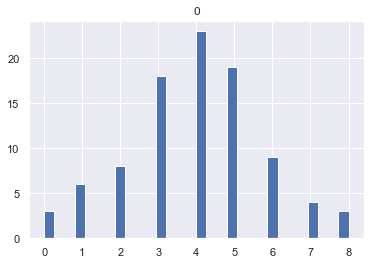

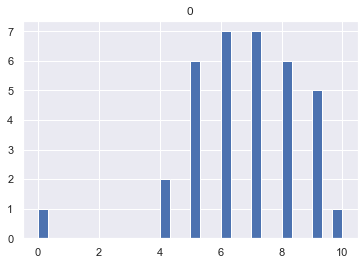

In [204]:
# выборки пренадлежат одному множеству
pd.DataFrame(data_2).hist(bins=30)
pd.DataFrame(data_1).hist(bins=30)

In [205]:
print('Среднее первой выборки:', pd.DataFrame(data_1).mean()[0])
print('Среднее второй выборки:', pd.DataFrame(data_2).mean()[0])
print('Среднее общей выборки:', general_data.mean())

Среднее первой выборки: 6.628571428571429
Среднее второй выборки: 3.967741935483871
Среднее общей выборки: 4.6953125


### Вывод:
Слишком большое значение p-value, мы не можем отклонить нулевую гипотезу, из графиков можем сделать вывод что выборки действительно принадлежат одному множеству

### Задание 11
Первая выборка — это пациенты, которых лечили препаратом А.  Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы? 

### Решение

In [206]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)


# Two-sample T-test

weight_df=pd.DataFrame({"weight_before":A,
                         "weight_after":B,
                         "weight_change":A-B})
weight_df.describe()

,weight_before,weight_after,weight_change
count,300.000000,300.000000,300.000000
mean,168.996623,171.279351,-2.282728
std,14.514851,14.112601,19.429630
min,129.200222,122.956041,-57.751642
25%,158.845516,162.917094,-14.574167
50%,168.725478,171.314729,-2.711816
75%,178.949547,179.880765,9.799642
max,202.027845,205.292058,49.073255


In [207]:
# только 2% шансов найти различия между препаратами

stats.ttest_rel(a=A,b=B)

Ttest_relResult(statistic=-2.0349336314319992, pvalue=0.042739435733033855)

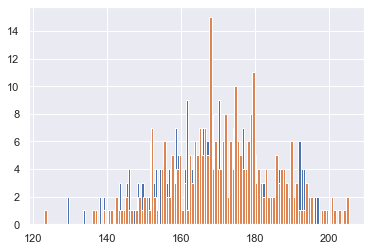

In [208]:
 #Расскомментировать, если интересно увидеть отличия визуально
plt.hist(A, bins=120);
plt.hist(B, bins=120);

In [209]:
alpha = 0.05
x_mean = np.mean(A)
n = 25
sigma = 15
z_alpha = 1 - (1 - 0.98) / 2
Z = st.norm.ppf(z_alpha)
Delta = (sigma / sqrt(n)) * Z

print(f'Доверительный интервал для выборки А: {int(x_mean - Delta)}, {int(x_mean + Delta)}')

Доверительный интервал для выборки А: 162, 175


In [210]:
alpha = 0.05
x_mean = np.mean(B)
n = 25
sigma = 15
z_alpha = 1 - (1 - 0.98) / 2
Z = st.norm.ppf(z_alpha)
Delta = (sigma / sqrt(n)) * Z

print(f'Доверительный интервал для выборки B: {int(x_mean - Delta)}, {int(x_mean + Delta)}')

Доверительный интервал для выборки B: 164, 178


In [211]:
# Схожесть доверительных интервалов, подтверждает нашу догадку о том, 
# что найти различия между препаратами, можно только в небольшом количестве случаем